In [1]:
import json
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


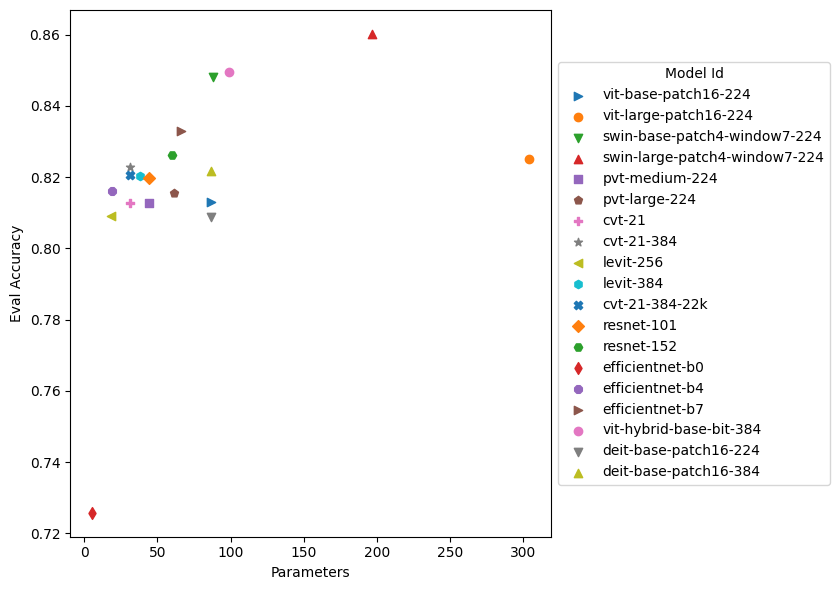

In [5]:
path = '/content/drive/MyDrive/imagenet-1k'

dir_list = os.listdir(path)

markers = ['>','o','v','^','s','p',
             'P','*','<','h','X','D','H','d','8']

accuracies = []
parameters = []
model_Id = []

for files in dir_list:
  file = os.path.join(path, files, 'eval_results.json')
  with open(file, 'r') as f:
      data = json.load(f)
      # Extract values and append to lists
      model_Id.append(files)
      try:
        accuracies.append(data['eval_train_accuracy'])
      except:
        accuracies.append(data['eval_validation_accuracy'])
      parameters.append(data['parameters'])

plt.figure(figsize=(10, 6))
for i in range(len(model_Id)):
  plt.scatter(parameters[i], accuracies[i], label=model_Id[i], marker=markers[i % len(markers)])

plt.xlabel('Parameters')
plt.ylabel('Eval Accuracy')

# Place legend outside of the plot
plt.legend(title='Model Id', loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(False)

# Adjust the layout to fit the legend outside the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

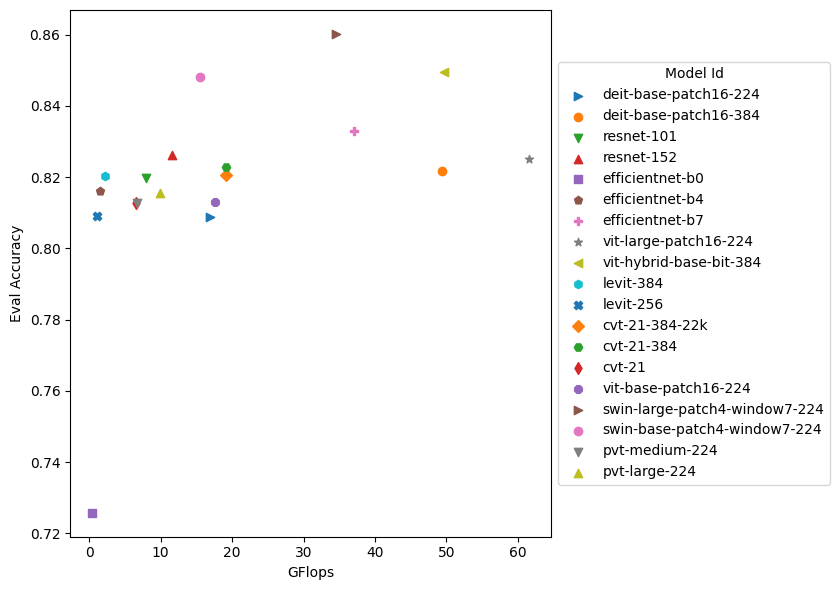

In [ ]:
path = '/content/drive/MyDrive/imagenet-1k'

dir_list = os.listdir(path)

markers = ['>','o','v','^','s','p',
             'P','*','<','h','X','D','H','d','8']

accuracies = []
GMacs = []
model_Id = []

for files in dir_list:
  file = os.path.join(path, files, 'eval_results.json')
  with open(file, 'r') as f:
      data = json.load(f)
      # Extract values and append to lists
      model_Id.append(files)
      try:
        accuracies.append(data['eval_train_accuracy'])
      except:
        accuracies.append(data['eval_validation_accuracy'])
      GMacs.append(data['GMacs'])

plt.figure(figsize=(10, 6))
for i in range(len(model_Id)):
    plt.scatter(GMacs[i], accuracies[i], label=model_Id[i], marker=markers[i % len(markers)])

plt.xlabel('GFlops')
plt.ylabel('Eval Accuracy')

# Place the legend outside of the plot on the right
plt.legend(title='Model Id', loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(False)

# Adjust layout to fit the legend outside the plot area
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

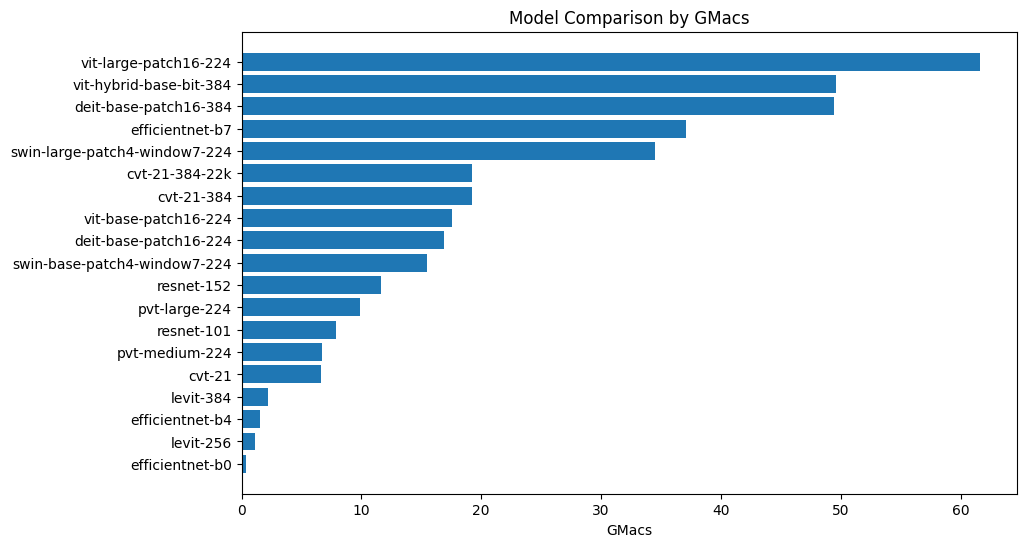

In [ ]:
path = '/content/drive/MyDrive/imagenet-1k'

dir_list = os.listdir(path)

GMacs = []
model_Id = []

for files in dir_list:
  file = os.path.join(path, files, 'eval_results.json')
  with open(file, 'r') as f:
      data = json.load(f)
      # Extract values and append to lists
      model_Id.append(files)
      GMacs.append(data['GMacs'])

# Sort data in ascending order
sorted_indices = sorted(range(len(GMacs)), key=lambda i: GMacs[i])
sorted_models = [model_Id[i] for i in sorted_indices]
sorted_gmacs = [GMacs[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_gmacs)
plt.xlabel('GMacs')
plt.title('Model Comparison by GMacs')
plt.show()

In [ ]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

path = '/content/drive/MyDrive/imagenet-1k'

dir_list = os.listdir(path)

eval_accuracy = []
eval_loss = []
eval_runtime = []
eval_samples_per_second = []
eval_steps_per_second = []
parameters = []
GMacs = []
Device = []
model_Id = []

for files in dir_list:
  file = os.path.join(path, files, 'eval_results.json')
  with open(file, 'r') as f:
      data = json.load(f)
      # Extract values and append to lists
      model_Id.append(files)
      try:
        eval_accuracy.append(data['eval_train_accuracy'])
      except:
        eval_accuracy.append(data['eval_validation_accuracy'])
      try:
        eval_loss.append(data['eval_train_loss'])
      except:
        eval_loss.append(data['eval_validation_loss'])
      try:
        eval_runtime.append(data['eval_train_runtime'])
      except:
        eval_runtime.append(data['eval_validation_runtime'])
      try:
        eval_samples_per_second.append(data['eval_train_samples_per_second'])
      except:
        eval_samples_per_second.append(data['eval_validation_samples_per_second'])
      try:
        eval_steps_per_second.append(data['eval_train_steps_per_second'])
      except:
        eval_steps_per_second.append(data['eval_validation_steps_per_second'])
      parameters.append(data['parameters'])
      GMacs.append(data['GMacs'])
      Device.append(data['Device'])


df = pd.DataFrame()
df['Model Id'] = model_Id
df['Eval Accuracy'] = eval_accuracy
df['Eval Loss'] = eval_loss
df['Eval Runtime'] = eval_runtime
df['Eval Samples per Second'] = eval_samples_per_second
df['Eval Steps per Second'] = eval_steps_per_second
df['Parameters'] = parameters
df['GMacs'] = GMacs
df['Device'] = Device

df.to_csv('results_1.csv', index=False)

final_df = df.sort_values(by=['Eval Accuracy'], ascending=True)

final_df.to_csv('results_2.csv', index=False)

%cp /content/results_1.csv /content/drive/MyDrive/imagenet-1k
%cp /content/results_2.csv /content/drive/MyDrive/imagenet-1k